In [11]:

import pandas as pd
import numpy as np

# pd.set_option("display.max_columns", None)
# pd.set_option('display.max_colwidth', None) #50 for truncated view, -1 for full view

In [12]:
attacks_list_df = pd.read_csv('attacks_list_df.csv')
attacks_list_df.rename(columns={'End Time':'end_time'}, inplace=True)
attacks_list_df.rename(columns={'Start Time':'start_time'}, inplace=True)
attacks_list_df.rename(columns={'Attack Type':'attack_type'}, inplace=True)
attacks_list_df.rename(columns={'Attack#':'num_attack'}, inplace=True)

In [13]:
df = pd.read_pickle('dataset/clean_dataset.pkl')


In [14]:
attacks_list_df['start_time'] = pd.to_datetime(attacks_list_df['start_time'])
attacks_list_df['end_time'] = pd.to_datetime(attacks_list_df['end_time'])
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['attack'] = 0
for i in range(len(attacks_list_df)):
    attack_num = attacks_list_df.iloc[i]
    s = df['Timestamp'].between(attack_num['start_time'], attack_num['end_time'])
    df['attack'].loc[s] = attack_num['num_attack']

/var/folders/cc/whpcb33912lfp0b714xmf83m0000gn/T/ipykernel_37686/2581331760.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['attack'].loc[s] = attack_num['num_attack']


In [57]:
LIT_101_MM = {  # raw water tank mm
    'LL': 250.0,
    'L': 500.0,
    'H': 800.0,
    'HH': 1200.0,
}

df['LIT101_label'] = df['LIT101'].apply(lambda x: 'HH' if x > LIT_101_MM['HH'] else 'H' if x > LIT_101_MM['H'] else 'L' if x > LIT_101_MM['L'] else 'LL')

<AxesSubplot:xlabel='Timestamp', ylabel='Count'>

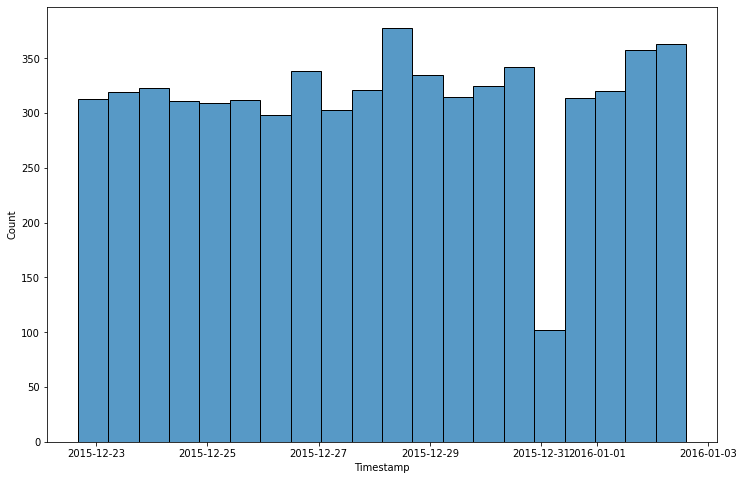

In [78]:
# sns.scatterplot(x='Timestamp', y='MV303', data=df[df['MV303'] == 0])

plt.figure(figsize=(12,8))
sns.histplot(x='Timestamp', data=df[df['MV302'] == 0])

<AxesSubplot:xlabel='Timestamp', ylabel='MV303'>

/Users/david/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


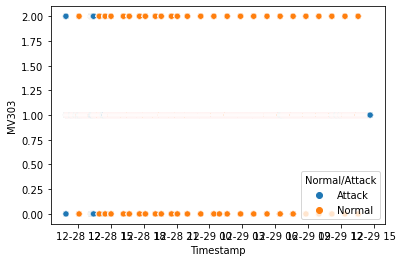

In [66]:

sns.scatterplot(x='Timestamp', y='MV303', data=df.iloc[500000:600000], hue='Normal/Attack')
# df[['LIT101_label', 'Normal/Attack']]

<AxesSubplot:xlabel='Timestamp', ylabel='Normal/Attack'>

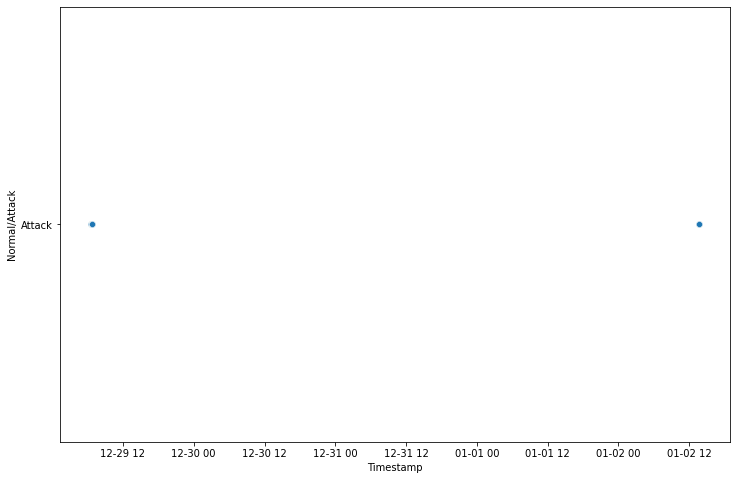

In [27]:
(df[['attack', 'Normal/Attack']].sort_values('attack').value_counts())
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.scatterplot(x='Timestamp', y='Normal/Attack', data=df[(df['attack'] == 0) & (df['Normal/Attack'] == 'Attack')])


In [28]:
df[(df['attack'] == 0) & (df['Normal/Attack'] == 'Attack')]

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack,index,attack
570600,2015-12-29 06:30:00,2.615380,506.4783,2,2,1,258.0749,8.390028,334.6321,2.447186,...,252.1148,0.929100,190.2557,0.0,1,1,1,Attack,570600,0
570601,2015-12-29 06:30:01,2.595522,506.3998,2,2,1,258.0749,8.390028,334.5296,2.447186,...,252.0187,0.929100,190.1756,0.0,1,1,1,Attack,570601,0
570602,2015-12-29 06:30:02,2.575665,506.2428,2,2,1,258.0749,8.390028,334.5296,2.450774,...,252.0187,0.897062,190.1756,0.0,1,1,1,Attack,570602,0
570603,2015-12-29 06:30:03,2.555488,505.8896,2,2,1,258.0749,8.390028,334.5296,2.450774,...,252.0187,0.897062,190.1756,0.0,1,1,1,Attack,570603,0
570604,2015-12-29 06:30:04,2.538833,505.6148,2,2,1,258.0749,8.390028,334.5296,2.452312,...,252.0187,0.897062,190.1756,0.0,1,1,1,Attack,570604,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941986,2016-01-02 13:41:07,2.534670,524.1028,2,2,1,168.8990,8.633236,304.5373,2.461026,...,249.5193,0.945119,187.5801,0.0,1,1,1,Attack,941986,0
941987,2016-01-02 13:41:08,2.517055,524.2206,2,2,1,168.8990,8.633236,304.5373,2.461026,...,249.5193,0.945119,187.5801,0.0,1,1,1,Attack,941987,0
941988,2016-01-02 13:41:09,2.502322,524.2206,2,2,1,168.8990,8.633236,304.5373,2.461026,...,249.5193,0.945119,187.5801,0.0,1,1,1,Attack,941988,0
941989,2016-01-02 13:41:10,2.482465,524.2991,2,2,1,168.8990,8.634518,304.5373,2.461026,...,249.5193,0.945119,187.5801,0.0,1,1,1,Attack,941989,0


In [29]:
df_raw = pd.read_excel('SWaT_Dataset_Attack_v0.xlsx')

/Users/david/miniconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [31]:
# df_raw_backup = df_raw.copy()

In [39]:
# df_raw = df_raw_backup.copy()

In [46]:
time = df_raw[' Timestamp'].iloc[50000]
time_ = pd.to_datetime(time, format=' %d/%m/%Y %I:%M:%S %p')
print(time)
time_

 28/12/2015 11:53:20 PM


Timestamp('2015-12-28 23:53:20')

In [47]:
df_raw[' Timestamp'] = pd.to_datetime(df_raw[' Timestamp'], format=' %d/%m/%Y %I:%M:%S %p')

In [48]:

df_raw[df_raw[' Timestamp'].between('2015-12-29 06:29:59', '2015-12-29 07:00:00')]  


,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
73799,2015-12-29 06:29:59,2.620184,506.4391,2,2,1,258.0749,8.390028,334.7603,2.447186,...,2,1,252.1469,0.929100,190.3358,0.0,1,1,1,Normal
73800,2015-12-29 06:30:00,2.615380,506.4783,2,2,1,258.0749,8.390028,334.6321,2.447186,...,2,1,252.1148,0.929100,190.2557,0.0,1,1,1,Attack
73801,2015-12-29 06:30:01,2.595522,506.3998,2,2,1,258.0749,8.390028,334.5296,2.447186,...,2,1,252.0187,0.929100,190.1756,0.0,1,1,1,Attack
73802,2015-12-29 06:30:02,2.575665,506.2428,2,2,1,258.0749,8.390028,334.5296,2.450774,...,2,1,252.0187,0.897062,190.1756,0.0,1,1,1,Attack
73803,2015-12-29 06:30:03,2.555488,505.8896,2,2,1,258.0749,8.390028,334.5296,2.450774,...,2,1,252.0187,0.897062,190.1756,0.0,1,1,1,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75596,2015-12-29 06:59:56,2.499439,647.0817,2,1,1,258.0108,8.456358,321.5073,0.000000,...,2,1,252.2751,0.816967,190.4640,0.0,1,1,1,Normal
75597,2015-12-29 06:59:57,2.552926,647.8275,2,1,1,258.0108,8.456358,321.5073,0.000000,...,2,1,252.2751,0.816967,190.4640,0.0,1,1,1,Normal
75598,2015-12-29 06:59:58,2.586555,647.5920,2,1,1,258.0108,8.456358,321.5073,0.000000,...,2,1,252.2751,0.816967,190.4640,0.0,1,1,1,Normal
75599,2015-12-29 06:59:59,2.619223,648.5733,2,1,1,258.0108,8.456358,321.5073,0.000000,...,2,1,252.2751,0.816967,190.4640,0.0,1,1,1,Normal


In [ ]:
start_date = pd.to_datetime(df_raw[' Timestamp'].iloc[0])
end_date = pd.to_datetime(df_raw[' Timestamp'].iloc[1])
first_attack = False
data_attack = pd.DataFrame()


for i in range(len(df_raw)):
    row = df_raw.iloc[i]
    attack = row['Normal/Attack']

    if attack == 'Attack' and first_attack == False:
        start_date = row[' Timestamp']
        first_attack = True

    if attack == 'Normal' and first_attack == True:
        end_date = row[' Timestamp']
        first_attack = False
        data_attack = data_attack.append({"start_date":start_date, "end_date":end_date}, ignore_index=True)



In [50]:
data_attack

,start_date,end_date
0,2015-12-28 10:29:14,2015-12-28 10:44:54
1,2015-12-28 10:51:08,2015-12-28 10:58:31
2,2015-12-28 11:22:00,2015-12-28 11:28:23
3,2015-12-28 11:47:39,2015-12-28 11:54:09
4,2015-12-28 12:00:55,2015-12-28 12:04:11
5,2015-12-28 12:08:25,2015-12-28 12:15:34
6,2015-12-28 13:10:10,2015-12-28 13:26:14
7,2015-12-28 14:16:20,2015-12-28 14:28:21
8,2015-12-29 06:30:00,2015-12-29 06:42:01
9,2015-12-29 11:11:25,2015-12-29 11:15:18


In [55]:
df_raw[df_raw[' Timestamp'].between('2016-01-02 13:13:01', '2016-01-02 13:41:12')][[' Timestamp', 'Normal/Attack']]

,Timestamp,Normal/Attack
443500,2016-01-02 13:13:01,Normal
443501,2016-01-02 13:13:02,Attack
443502,2016-01-02 13:13:03,Attack
443503,2016-01-02 13:13:04,Attack
443504,2016-01-02 13:13:05,Attack
...,...,...
445187,2016-01-02 13:41:08,Attack
445188,2016-01-02 13:41:09,Attack
445189,2016-01-02 13:41:10,Attack
445190,2016-01-02 13:41:11,Attack


In [54]:
df_raw[df_raw[' Timestamp'].between('2015-12-29 18:30:00', '2015-12-29 18:42:00')][[' Timestamp', 'Normal/Attack']]

,Timestamp,Normal/Attack
117000,2015-12-29 18:30:00,Attack
117001,2015-12-29 18:30:01,Attack
117002,2015-12-29 18:30:02,Attack
117003,2015-12-29 18:30:03,Attack
117004,2015-12-29 18:30:04,Attack
...,...,...
117716,2015-12-29 18:41:56,Attack
117717,2015-12-29 18:41:57,Attack
117718,2015-12-29 18:41:58,Attack
117719,2015-12-29 18:41:59,Attack
